<h2>IDEA:</h2>
There is higher usage of citi bikes during rush hours on weekdays than during the same hours on weekends <i>as a result of commuters using the bikes</i>. 

<h2>NULL HYPOTHESIS:</h2>
The ratio of bike trips on weekends during weekday rush hours, 7-10 AM and 4-7 PM, is the same or higher compared to the same hours on weekdays. 

In [223]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
from pandas import Timestamp
import zipfile 
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [224]:
os.getenv('PUI2016')

'/home/cusp/bja282/PUI2016'

In [225]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system

datestring='201407'

def getCitiBikeCSV(datestring):
    os.system("!curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
### unzip the csv 
    os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
## NOTE: old csv citibike data had a different name structure. 

In [226]:
#getCitiBikeCSV(datestring)
!curl -O 'https://s3.amazonaws.com/tripdata/201407-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.4M  100 29.4M    0     0  37.8M      0 --:--:-- --:--:-- --:--:-- 47.4M


In [227]:
#Unzip zip file to attain CSV.
#Reference on how to unzip files: https://docs.python.org/2/library/zipfile.html
#More reference: http://stackoverflow.com/questions/32073792/typeerror-using-zipfile-extractall
zf = zipfile.ZipFile('201407-citibike-tripdata.zip', mode='r')
zf.extractall()
zf.close()

In [228]:
datestring='201407'
df_Citi = pd.read_csv(os.getenv('PUI2016') + '_bja282/HW3_bja282/2014-07 - Citi Bike trip data.csv')
df_Citi['date'] = pd.to_datetime(df_Citi['starttime'])
df_Citi.set_index('date', inplace=True)
print("Citi Bike Data:")
df_Citi.head()

Citi Bike Data:


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
date,,,,,,,,,,,,,,,
2014-07-01 00:00:04,404,2014-07-01 00:00:04,2014-07-01 00:06:48,545,E 23 St & 1 Ave,40.736502,-73.978095,402,Broadway & E 22 St,40.740343,-73.989551,19578,Subscriber,1987,2
2014-07-01 00:00:06,850,2014-07-01 00:00:06,2014-07-01 00:14:16,238,Bank St & Washington St,40.736197,-74.008592,458,11 Ave & W 27 St,40.751396,-74.005226,19224,Subscriber,1987,1
2014-07-01 00:00:21,1550,2014-07-01 00:00:21,2014-07-01 00:26:11,223,W 13 St & 7 Ave,40.737815,-73.999947,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,17627,Subscriber,1973,2
2014-07-01 00:00:29,397,2014-07-01 00:00:29,2014-07-01 00:07:06,224,Spruce St & Nassau St,40.711464,-74.005524,2008,Little West St & 1 Pl,40.705693,-74.016777,15304,Subscriber,1982,1
2014-07-01 00:00:37,609,2014-07-01 00:00:37,2014-07-01 00:10:46,346,Bank St & Hudson St,40.736529,-74.006180,521,8 Ave & W 31 St,40.750450,-73.994811,20062,Subscriber,1972,2


In [229]:
##List columns, in order to determine which ones to drop. 
df_Citi.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [230]:
#Drop columns irrelevant to the exploration.
df_Citi.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'starttime'], axis=1, inplace=True)

df_Citi.columns

Index([], dtype='object')

In [231]:
df_Citi.head()

""
date
2014-07-01 00:00:04
2014-07-01 00:00:06
2014-07-01 00:00:21
2014-07-01 00:00:29
2014-07-01 00:00:37


In [232]:
#Used StackExchange response to inform boolean logic in df_citi Morning and Evening Rush hours dataframe columns below.
#http://stackoverflow.com/questions/35004241/pandas-between-time-boolean
df_Citi['MorningRush']=df_Citi.index.isin(df_Citi.between_time('7:00', '10:00', include_start=True, include_end=True).index)
df_Citi['EveningRush']=df_Citi.index.isin(df_Citi.between_time('15:30', '20:00', include_start=True, include_end=True).index)
df_morningrush = df_Citi.between_time("7:00","10:00")
df_eveningrush = df_Citi.between_time("15:30", "20:00")
df_Citi['Rush']=np.where(np.logical_or(df_Citi['MorningRush']==True, df_Citi['EveningRush']==True), 1, 0)

In [233]:
df_Citi.reset_index(inplace=True)

In [234]:
df_Citi.head()

,date,MorningRush,EveningRush,Rush
0,2014-07-01 00:00:04,False,False,0
1,2014-07-01 00:00:06,False,False,0
2,2014-07-01 00:00:21,False,False,0
3,2014-07-01 00:00:29,False,False,0
4,2014-07-01 00:00:37,False,False,0


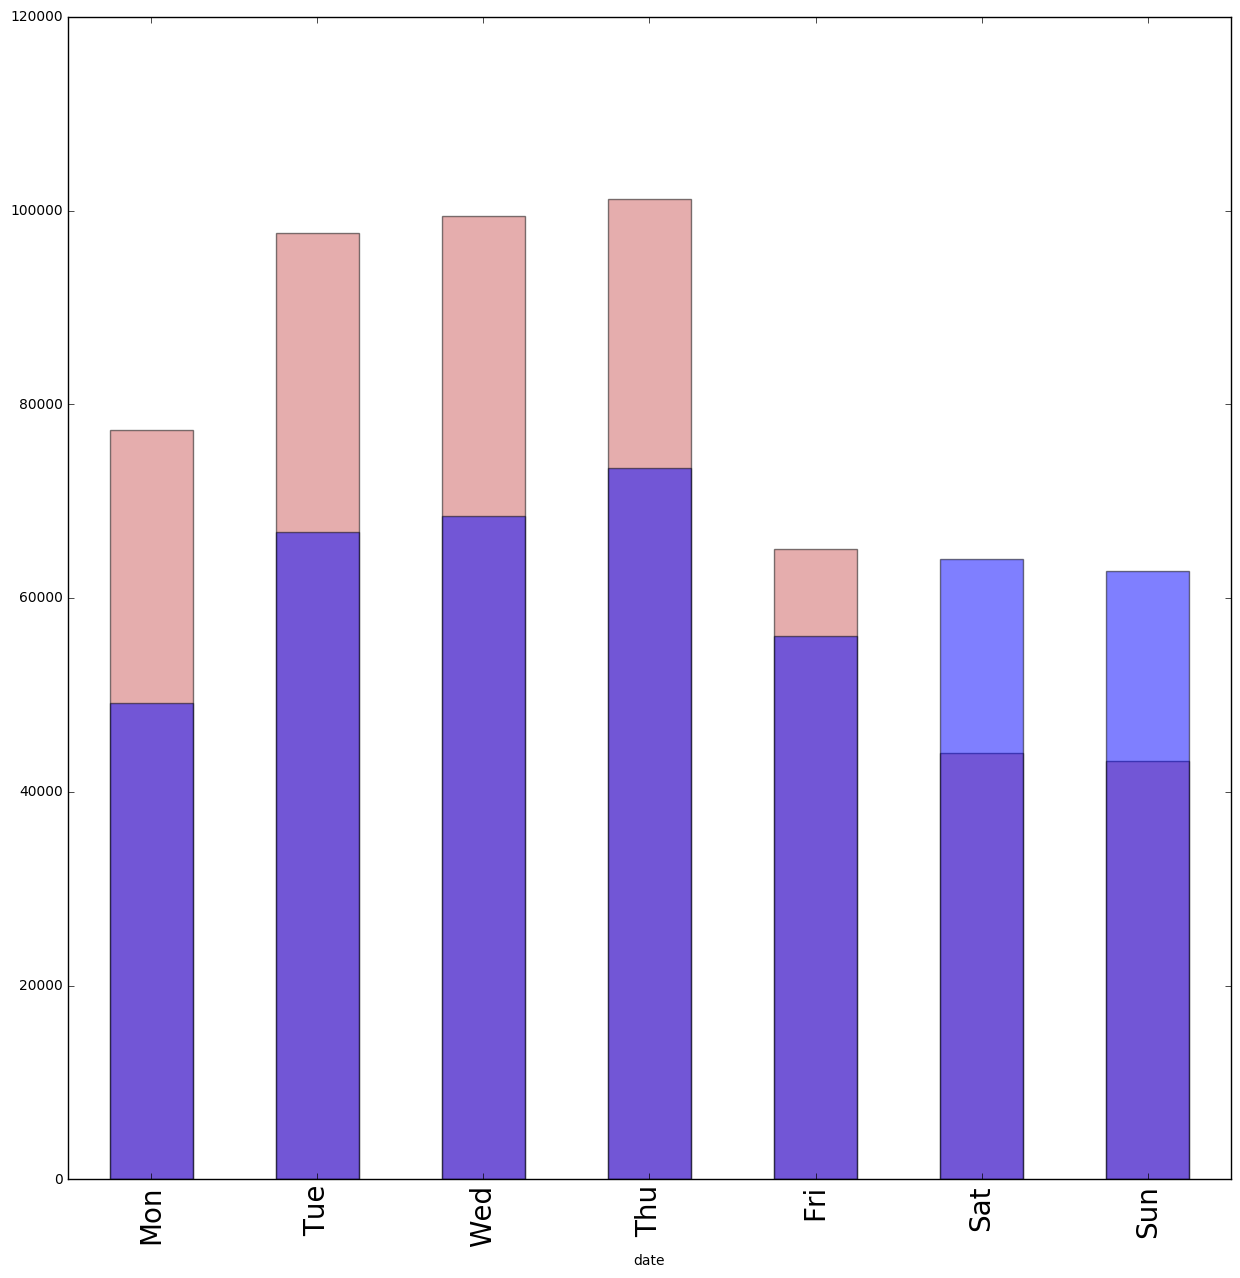

In [235]:
##Based on Prof. Bianco's example.
fig=pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_rush = 1
((df_Citi['date'][df_Citi['Rush'] == 1].groupby([df_Citi['date'].dt.weekday]).count()) / norm_rush).plot(kind="bar", 
                                                                                         color='indianred', 
                                                                                         alpha=0.5)

norm_norush = 1
ax = ((df_Citi['date'][df_Citi['Rush'] == 0].groupby([df_Citi['date'].dt.weekday]).count()) / norm_norush).plot(kind="bar",
                                                                                            color='blue',
                                                                                              alpha=0.5)

tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

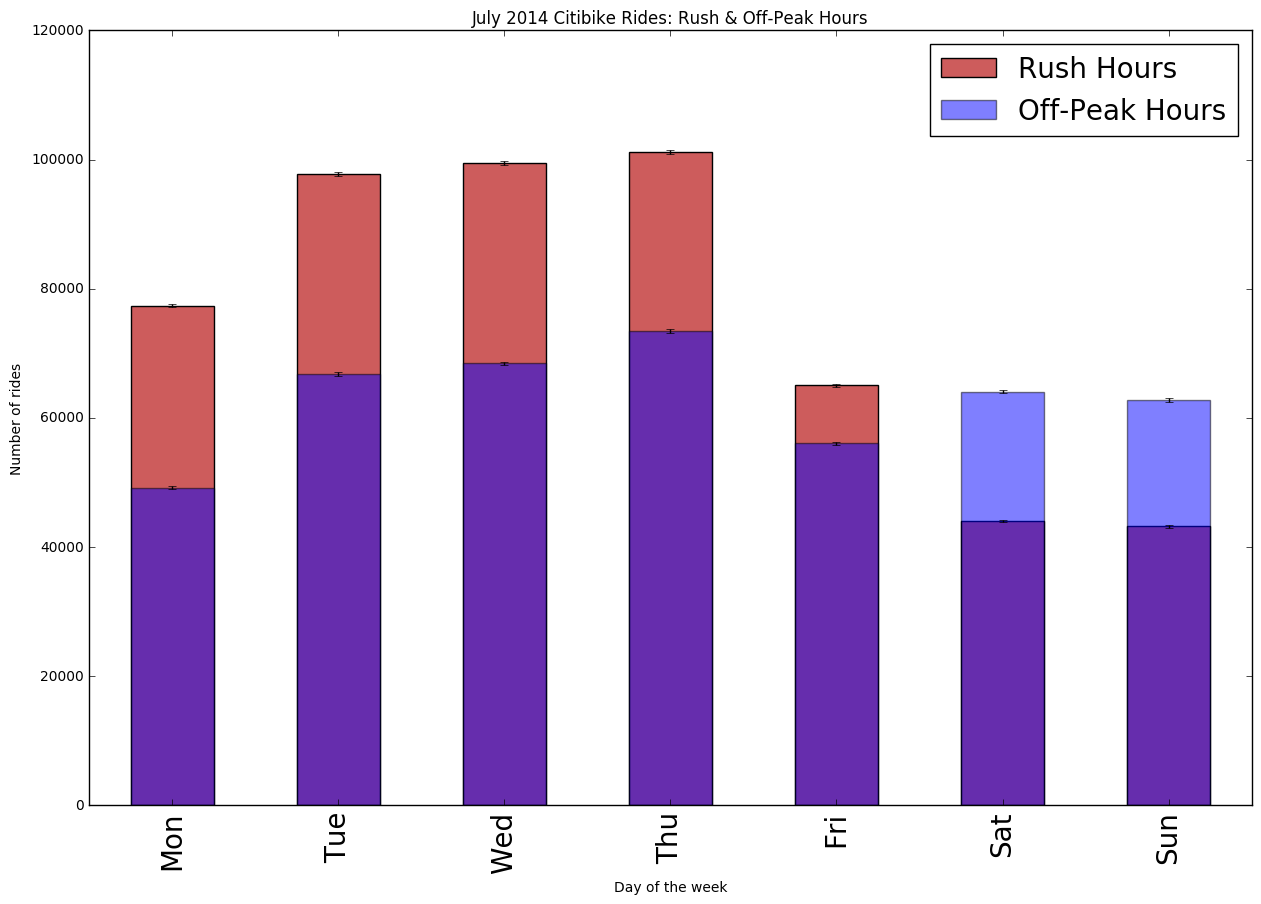

In [239]:
##Based on Prof. Bianco's example.
fig=pl.figure(figsize(15,10))

counts_rush = df_Citi.date[df_Citi.Rush == 1].groupby([df_Citi.date.dt.weekday]).count()
norm_rush = 1
error_rush = np.sqrt(counts_rush)
ax=((counts_rush) / norm_rush).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_rush) / norm_rush, (error_rush) / norm_rush)], label='Rush Hour Commutes')


counts_norush = df_Citi.date[df_Citi.Rush == 0].groupby([df_Citi.date.dt.weekday]).count()
norm_norush = 1
error_norush=np.sqrt(counts_norush)
((counts_norush) / norm_norush).plot(kind="bar", alpha=0.5, yerr=[((error_norush) / norm_norush, (error_norush) / norm_norush)], label='Off-Peak Hour Commutes')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.title("July 2014 Citibike Rides: Rush & Off-Peak Hours")
pl.legend(['Rush Hours','Off-Peak Hours'],fontsize=20)

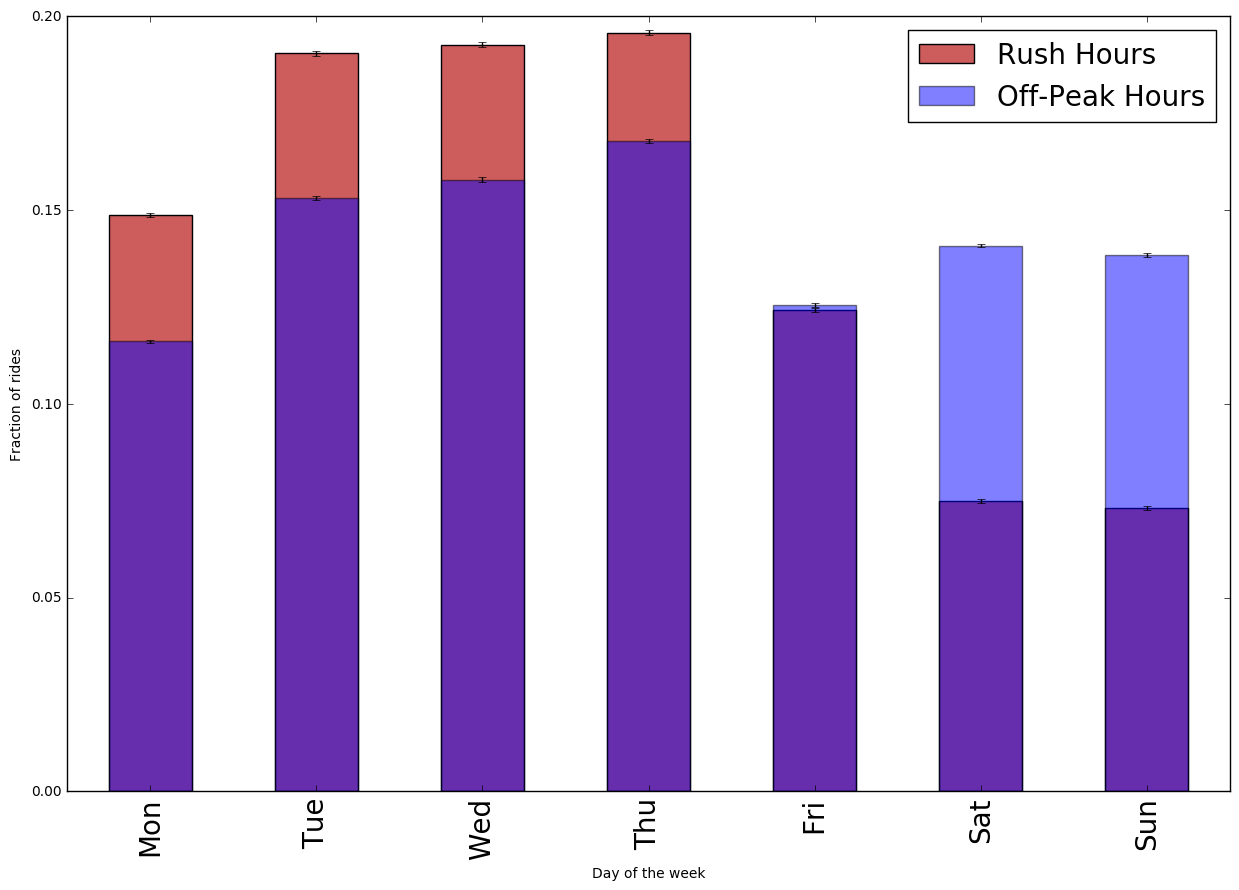

In [219]:
##Based on Prof. Bianco's example.
fig = pl.figure(figsize(15,10))

norm_rush = counts_rush.sum()
error_rush = np.sqrt(counts_rush)
((counts_rush) / norm_rush).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_rush) / norm_rush, (error_rush) / norm_rush)], label='Rush Hours')

norm_norush = counts_norush.sum()
ax = ((counts_norush) / norm_norush).plot(kind="bar", alpha=0.5, yerr=[((error_norush)/norm_norush,(error_norush)/norm_norush)], label='Off-Peak Hours')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Rush Hours','Off-Peak Hours'],fontsize=20)

Rush Hour: week:0.852, weekend:0.148, week error:0.001, weekend error:0.001
Off-Peak Hours: week:0.721, weekend:0.279, week error:0.001, weekend error:0.001


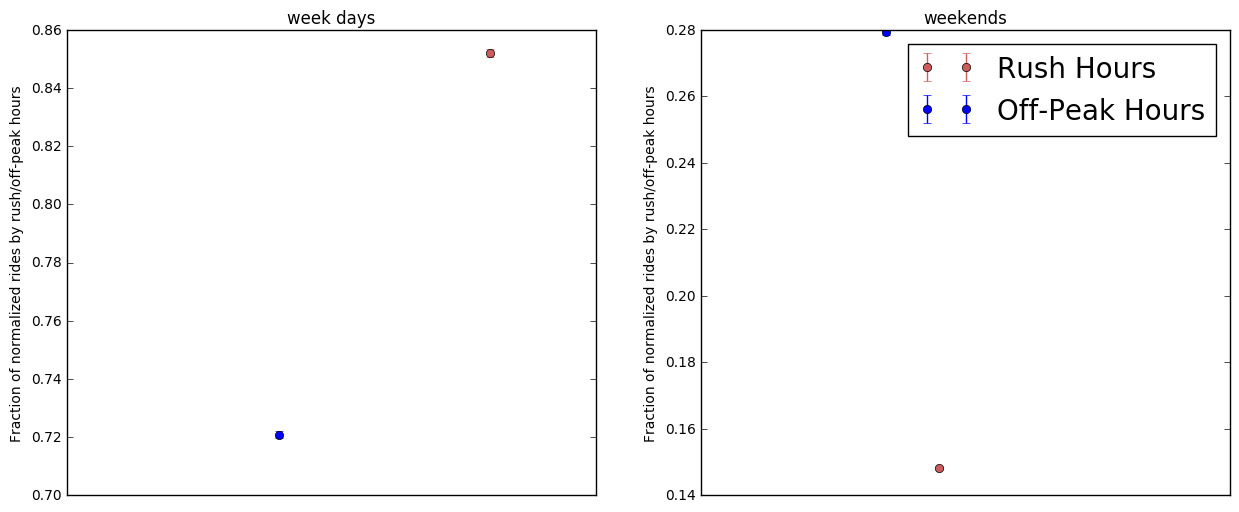

In [220]:
##Based on Prof. Bianco's example.
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
week_rush = sum(counts_rush[:-2]) * 1.0 / norm_rush
weekend_rush = sum(counts_rush[-2:]) * 1.0 / norm_rush
eweek_rush = np.sqrt(sum(error_rush[:-2]**2)) / norm_rush
eweekend_rush = np.sqrt(sum(error_rush[-2:]**2)) / norm_rush

week_norush = sum(counts_norush[:-2]) * 1.0 / norm_norush
weekend_norush = sum(counts_norush[-2:]) * 1.0 / norm_norush
eweek_norush = np.sqrt(sum(error_norush[:-2]**2)) / norm_norush
eweekend_norush = np.sqrt(sum(error_norush[-2:]**2)) / norm_norush

print("Rush Hour: week:{0:.3f}, weekend:{1:.3f}, week error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_rush, weekend_rush, eweek_rush, eweekend_rush))
print("Off-Peak Hours: week:{0:.3f}, weekend:{1:.3f}, week error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_norush, weekend_norush, eweek_norush, eweekend_norush))

ax1.errorbar([0.4], [week_rush], yerr=[eweek_rush], fmt='o', label='Rush Hours', color='indianred')
ax1.errorbar([0.2], [week_norush], yerr=[eweek_norush], fmt='o', label='Off-Peak Hours', color='blue')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_rush], yerr=[eweekend_rush], fmt='o', label='Rush Hours', color='indianred')
ax2.errorbar([0.2], [weekend_norush], yerr=[eweekend_norush], fmt='o', label='Off-Peak Hours', color='blue')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by rush/off-peak hours")
ax1.set_ylabel("Fraction of normalized rides by rush/off-peak hours")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)